<font color="yellow" size="6">Outliers</font>
<p><font color="GREEN" size="4">1.Isolation Forest</font>

Outliers are data points that significantly deviate from the general distribution of the data and can often affect the performance of machine learning models. 

The Isolation Forest algorithm is an effective method for detecting anomalies or outliers. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the feature. The more isolated a data point is, the more likely it is to be an outlier.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

The model is trained with the contamination parameter set to 0.05, which means that it assumes 5% of the data are outliers. You can adjust this parameter depending on how many outliers you expect in your data.

In [4]:
#Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Set contamination rate to 5%

In [5]:
# Fit the model on the data
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [6]:
# Predict outliers (1 for inliers, -1 for outliers)
predictions = model.predict(X)

Predictions: The model returns 1 for inliers (normal points) and -1 for outliers. We convert this to a boolean array for easier interpretation.

In [7]:
# Convert predictions to a boolean array (True for inliers, False for outliers)
outliers = predictions == -1


In [8]:
# Print the number of outliers detected
print(f"Number of outliers detected: {np.sum(outliers)}")

Number of outliers detected: 9


In [9]:
# Visualize the first two features to see how the outliers are detected
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

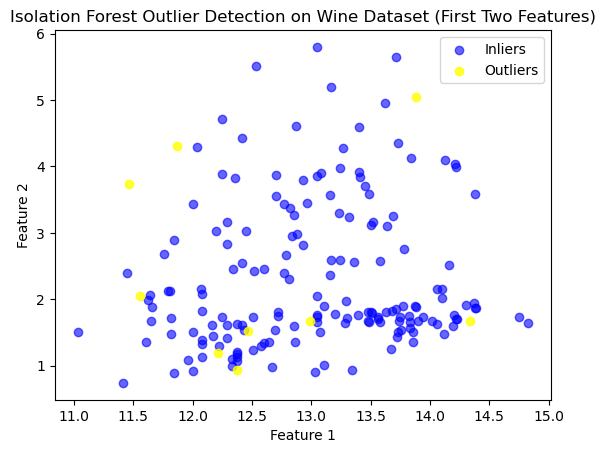

In [13]:
# Plot inliers (points classified as 1)
plt.scatter(X[~outliers, 0], X[~outliers, 1], color='blue', label='Inliers', alpha=0.6)
# Plot outliers (points classified as -1)
plt.scatter(X[outliers, 0], X[outliers, 1], color='yellow', label='Outliers', alpha=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Isolation Forest Outlier Detection on Wine Dataset (First Two Features)')
plt.show()

Plot: A scatter plot will show how the first two features of the dataset separate outliers and inliers. Inliers will be shown in blue, and outliers will be shown in yellow.

In [ ]:
# If you have a classification target (wine varieties), we can also show the classification report for comparison
print("\nClassification Report (Wine Varieties vs Outliers):")
print(classification_report(y, predictions))

<p>Key Notes:
<p>Outlier Detection: The Isolation Forest algorithm is designed for anomaly detection, which might not directly align with the class labels of the wine dataset. The true wine varieties (y) don’t correspond to outliers, so the classification report can show good performance metrics but doesn't truly reflect the quality of outlier detection.
<p>Visualizing Results: Visualizing just the first two features might not fully capture the complexity of the outlier detection, but it's a simple way to observe the performance of the Isolation Forest on the dataset.